In [17]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
## In this example, the data is in a data frame called data.
## Columns are individual samples (i.e. cells)
## Rows are measurements taken for all the samples (i.e. genes)
## Just for the sake of the example, we'll use made up data...

In [4]:
genes = ['gene' + str(i) for i in range(1,101)]

In [5]:
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

In [6]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [8]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [9]:
print(data.head())

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  137  141  134  130  155  473  523  471  490  483
gene2  244  243  240  235  269  907  951  958  958  936
gene3  617  598  559  626  545  664  644  652  690  652
gene4  657  606  637  684  653  331  333  307  313  317
gene5  678  747  723  750  748  431  377  411  439  427


In [10]:
print(data.shape)

(100, 10)


In [11]:
# Perform PCA on the data
# First center and scale the data
scaled_data = preprocessing.scale(data.T)

In [18]:
# StandardScaler().fit_transform(data.T)

array([[-1.01022225, -1.00526409, -0.17612208,  1.05123953,  0.66364378,
        -1.38297784, -1.10624571, -1.4132547 ,  1.05580966,  1.00886166,
        -0.91538581, -0.97450101, -1.04275673, -0.91169644,  0.99955695,
        -0.72794407, -0.99387145,  0.5982162 , -0.56709246, -0.85602789,
        -0.97173372, -0.03495765,  1.00845446, -0.97778571,  1.08447512,
        -1.32063738, -1.01811438, -1.11144951, -0.97399242,  1.04220359,
         1.12544828,  0.93378005, -1.83013727,  0.93081424, -0.99196352,
         1.38968761, -1.00527669, -1.05335731, -0.97133228,  1.05902141,
         1.21334075,  1.49132941,  0.82968161, -1.01617385,  0.8834874 ,
         1.17934757,  1.33724467,  1.12890393,  1.00285887, -1.02760098,
        -0.9358847 ,  0.92839285, -1.02635827, -0.55174207, -1.0523177 ,
         0.57243484, -1.00321318,  0.58435685, -0.91650825, -1.72590026,
        -0.97808577,  1.16140728,  1.50699202,  0.93402854, -1.00308967,
         1.86964952, -0.7525603 , -0.95774096,  0.6

In [12]:
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

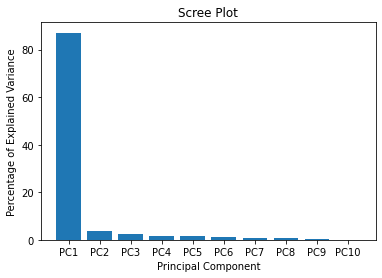

In [20]:
# Draw a scree plot and a PCA plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [21]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.374071,3.406689,1.426864,1.534553,1.367659,-0.087452,-0.312130,0.678483,-0.620915,-5.329071e-15
wt2,9.431016,-0.218429,-2.249544,0.625325,-1.148733,-1.017778,1.785935,0.489892,0.057321,-5.162537e-15
wt3,9.160139,-2.740040,2.501133,1.019501,-0.650127,-0.834265,-0.338708,-1.137300,0.119552,-8.881784e-16
wt4,8.901556,-1.985546,-0.361981,-1.242213,1.863114,1.994086,0.599609,-0.068017,0.154273,6.661338e-16
wt5,9.769019,1.367842,-1.240760,-1.877292,-1.406878,0.034232,-1.706767,0.063247,0.289290,7.771561e-16
ko1,-9.758755,-2.887848,-0.020161,1.010544,-0.690841,0.543697,-0.810962,1.477020,-0.392899,1.609823e-15
ko2,-9.007215,-0.484775,-2.136517,-0.337145,1.495173,-1.301877,-0.456354,-0.870919,-0.952143,2.553513e-15
ko3,-9.200915,0.427772,1.360510,-1.177642,1.019551,-1.356573,0.289141,0.580571,1.340744,1.998401e-15
ko4,-9.359020,1.661958,-1.159099,1.989269,-0.423821,1.331705,-0.078540,-0.885705,0.903225,3.996803e-15
ko5,-9.309896,1.452378,1.879556,-1.544899,-1.425096,0.694226,1.028777,-0.327272,-0.898448,-3.330669e-16


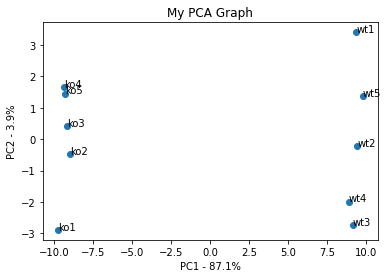

In [22]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [23]:
# Determine which genes had the biggest influence on PC1
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

In [24]:
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values

In [25]:
print(loading_scores[top_10_genes])

gene24   -0.107128
gene91    0.107108
gene34    0.107091
gene57   -0.107060
gene35   -0.107058
gene49    0.107056
gene81    0.107042
gene64    0.107029
gene93   -0.106981
gene71    0.106977
dtype: float64
